### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'], axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
print("Categories in 'gender' variable:", df['gender'].unique())
print("Categories in 'race ethnicity' variable:", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:", df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:", df['test_preparation_course'].unique())



Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [9]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [10]:
X = preprocessor.fit_transform(X)

In [11]:
print(X)

[[ 1.          0.          0.         ...  1.          0.19399858
   0.39149181]
 [ 1.          0.          0.         ...  0.          1.42747598
   1.31326868]
 [ 1.          0.          0.         ...  1.          1.77010859
   1.64247471]
 ...
 [ 1.          0.          0.         ...  0.          0.12547206
  -0.20107904]
 [ 1.          0.          0.         ...  0.          0.60515772
   0.58901542]
 [ 1.          0.          0.         ...  1.          1.15336989
   1.18158627]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((750, 19), (250, 19))

### Metrics for Evaluation by function

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "Xg bomodelost": XGBRegressor(),
    "Cat Boost" : CatBoostRegressor(),
    "Ada Boost" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- RME : {:.4f}".format(model_train_mae))
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print("-----------------------------------------------------------")

    
    print("Model Performance for test Set")
    print("- RME : {:.4f}".format(model_test_mae))
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- R2 score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model Performance for Training Set
- RME : 4.2383
- RMSE: 5.2972
- R2 score: 0.8743
-----------------------------------------------------------
Model Performance for test Set
- RME : 4.3379
- RMSE: 5.4825
- R2 score: 0.8778


Lasso
Model Performance for Training Set
- RME : 5.1837
- RMSE: 6.5515
- R2 score: 0.8077
-----------------------------------------------------------
Model Performance for test Set
- RME : 5.2217
- RMSE: 6.6541
- R2 score: 0.8200


Ridge
Model Performance for Training Set
- RME : 4.2368
- RMSE: 5.2976
- R2 score: 0.8743
-----------------------------------------------------------
Model Performance for test Set
- RME : 4.3354
- RMSE: 5.4788
- R2 score: 0.8780


K-Neighbors Regressor
Model Performance for Training Set
- RME : 4.5864
- RMSE: 5.7920
- R2 score: 0.8497
-----------------------------------------------------------
Model Performance for test Set
- RME : 5.5208
- RMSE: 7.1327
- R2 score: 0.7932


Decision Tree
Model Performance for Training

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.877990
0,Linear Regression,0.877824
7,Cat Boost,0.854830
5,Random Forest,0.846222
8,Ada Boost,0.840985
6,Xg bomodelost,0.836290
1,Lasso,0.820027
3,K-Neighbors Regressor,0.793207
4,Decision Tree,0.753276


### Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.78


### Plotting y_pred and y_test

Text(0, 0.5, 'Predicted')

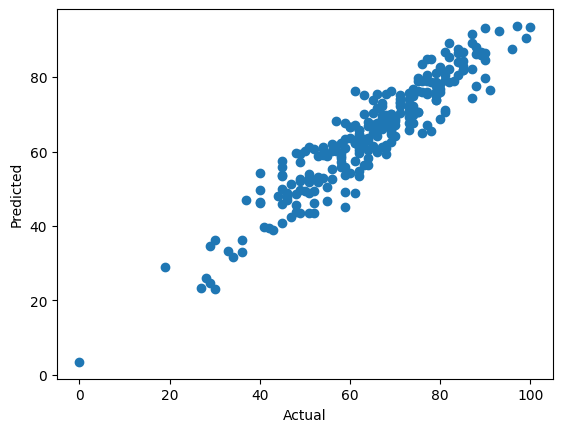

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

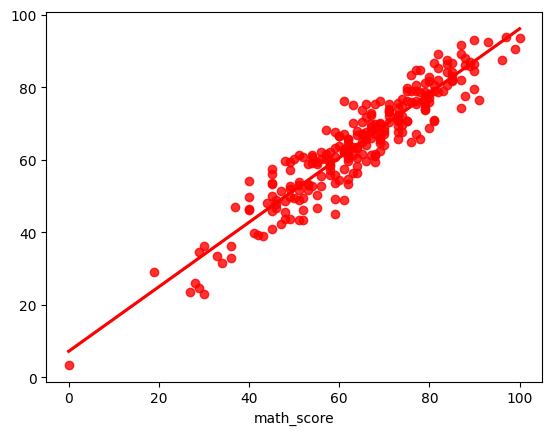

In [20]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [23]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value':y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
